In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [ ]:
import math

def haversineSeattle(coord):
    lon, lat = coord
    lonS, latS = (-122.335167, 47.608013)
    
    R = 6371000  # radius of Earth in meters
    phi = math.radians(lat)
    phi_S = math.radians(latS)
    
    delta_phi = math.radians(latS - lat)
    delta_lambda = math.radians(lonS - lon)
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi) * math.cos(phi_S) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    km = (R * c) / 1000  # output distance in kilometers

    km = round(km, 3)

    return km

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [5]:
df = df.dropna()

In [6]:
df.address
df_map = df.copy()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx

%matplotlib inline

In [8]:
df_map['loc'] = df_map[['long','lat']].values.tolist()

In [9]:
geometry = [Point(tuple(xy)) for xy in df_map['loc']]
geo_df = gpd.GeoDataFrame(df_map, crs="EPSG:4326", geometry=geometry)

In [10]:
df_wm = geo_df.to_crs(epsg=3857)

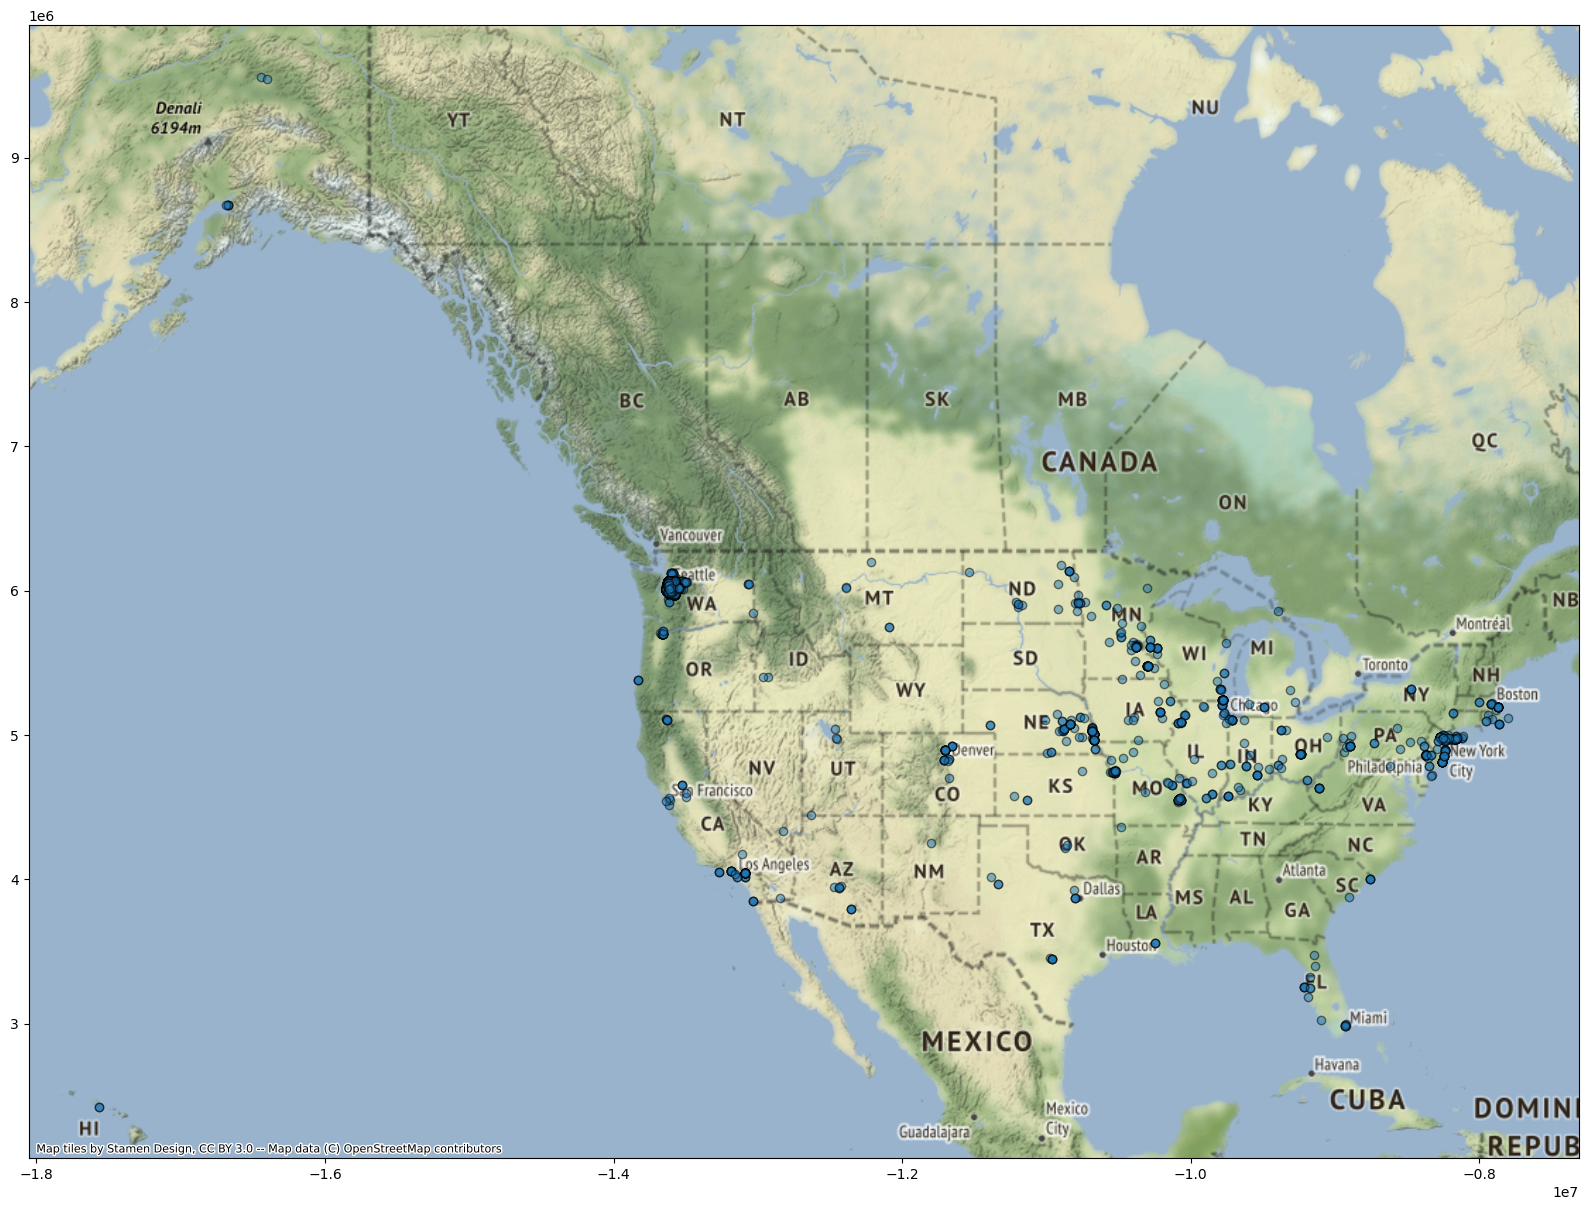

In [11]:
ax = df_wm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [12]:
df_map = df_map[(df_map.lat > 47.087) &
        (df_map.lat < 47.779) &
        (df_map.long > -122.527) &
        (df_map.long < -121.064)]

In [13]:
geometry = [Point(tuple(xy)) for xy in df_map['loc']]
geo_df = gpd.GeoDataFrame(df_map, crs="EPSG:4326", geometry=geometry)

In [14]:
df_wm = geo_df.to_crs(epsg=3857)

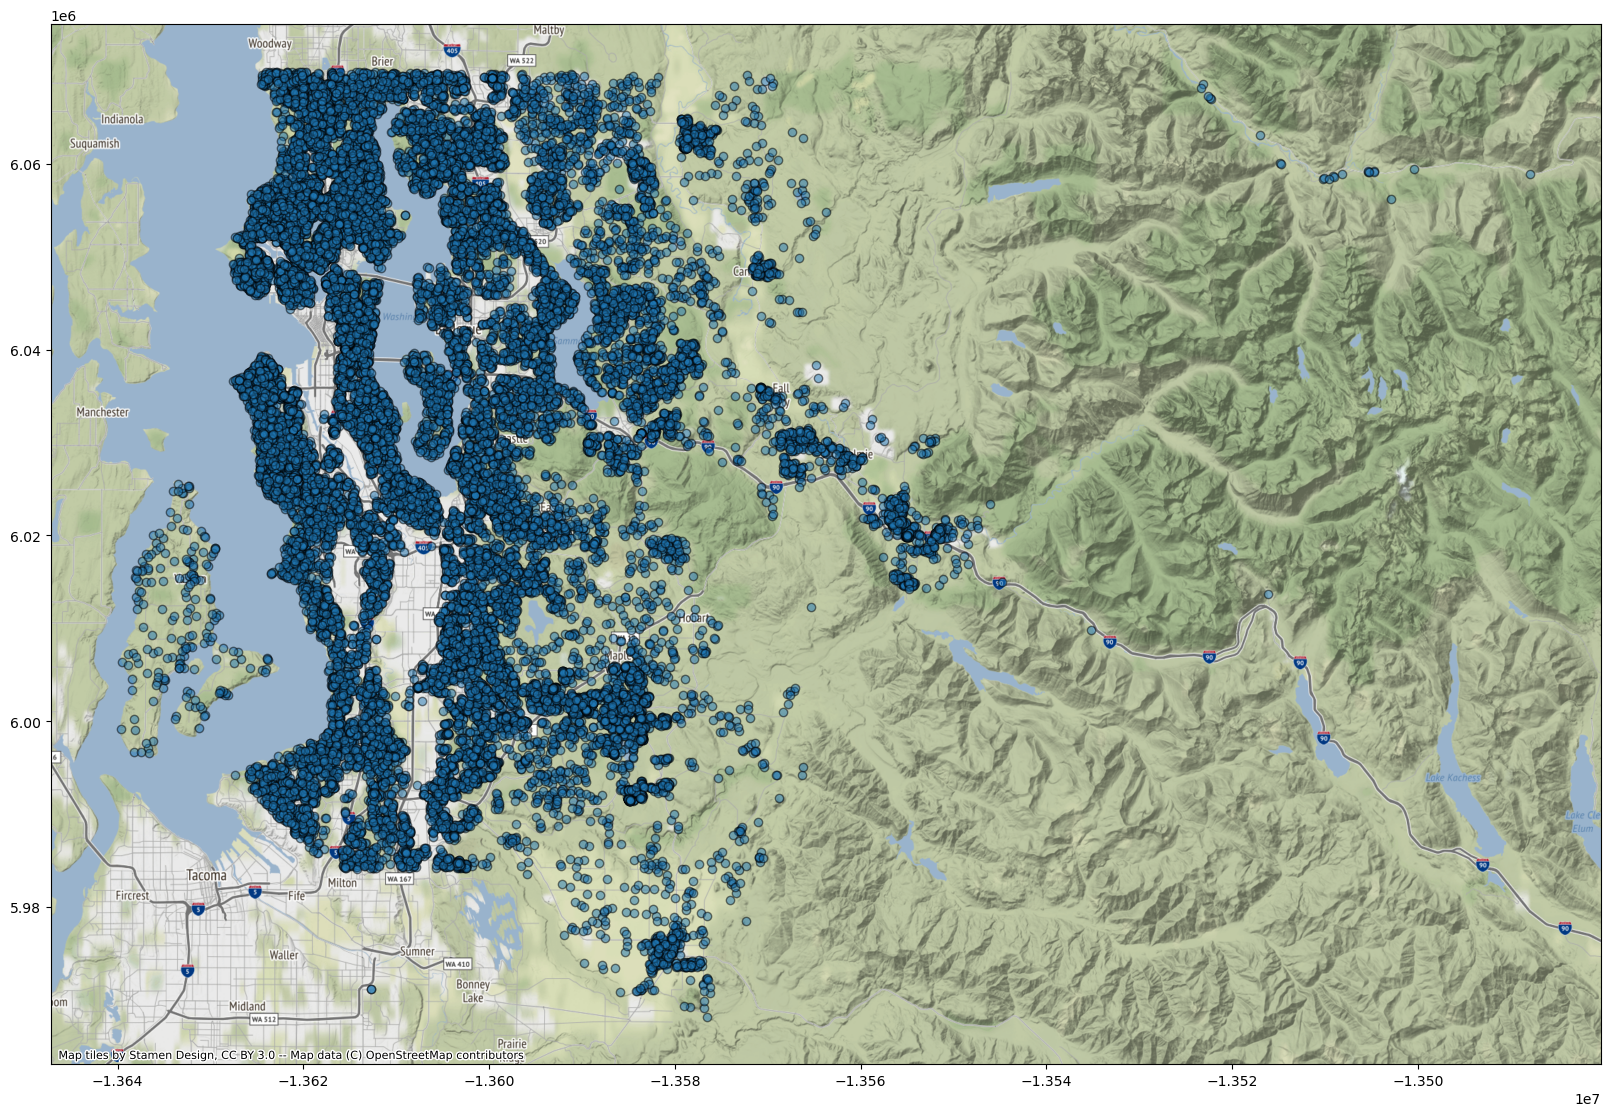

In [15]:
ax = df_wm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [16]:
df = df[(df.lat > 45) &
        (df.lat < 50) &
        (df.long > -124) &
        (df.long < -116)]

df.reset_index(drop=True, inplace=True)

In [332]:
df_split = df.address.str.split(', ')
df_split = df.address.str.split(' ')

AttributeError: 'DataFrame' object has no attribute 'address'

In [18]:
cities = []
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for x in df_split:
    if x[1][0] in numbers:
        cities.append(x[2])     
    else:
        cities.append(x[1])
pd.Series(cities)
df_split

0        [2102 Southeast 21st Court, Renton, Washington...
1        [11231 Greenwood Avenue North, Seattle, Washin...
2        [8504 South 113th Street, Seattle, Washington ...
3        [4079 Letitia Avenue South, Seattle, Washingto...
4        [2193 Northwest Talus Drive, Issaquah, Washing...
                               ...                        
29225    [4673 Eastern Avenue North, Seattle, Washingto...
29226    [4131 44th Avenue Southwest, Seattle, Washingt...
29227    [910 Martin Luther King Jr Way, Seattle, Washi...
29228    [17127 114th Avenue Southeast, Renton, Washing...
29229    [18615 7th Avenue South, Burien, Washington 98...
Name: address, Length: 29230, dtype: object

In [19]:
df['city'] = pd.Series(cities)

In [20]:
city_dummies = pd.get_dummies(df.city)
city_dummies

Algona  Ames Lake  Arlington  Auburn  Baring  Beaux Arts  Beaverton  \
0           0          0          0       0       0           0          0   
1           0          0          0       0       0           0          0   
2           0          0          0       0       0           0          0   
3           0          0          0       0       0           0          0   
4           0          0          0       0       0           0          0   
...       ...        ...        ...     ...     ...         ...        ...   
29225       0          0          0       0       0           0          0   
29226       0          0          0       0       0           0          0   
29227       0          0          0       0       0           0          0   
29228       0          0          0       0       0           0          0   
29229       0          0          0       0       0           0          0   

       Bellevue  Black Diamond  Bothell  ...  Spanaway  Spokane  Tukwila  \
0             0              0        0  ...         0        0        0   
1             0              0        0  ...         0        0        0   
2             0              0        0  ...         0        0        0   
3             0              0        0  ...         0        0        0   
4             0              0        0  ...         0        0        0   
...         ...            ...      ...  ...       ...      ...      ...   
29225         0              0        0  ...         0        0        0   
29226         0              0        0  ...         0        0        0   
29227         0              0        0  ...         0        0        0   
29228         0              0        0  ...         0        0        0   
29229         0              0        0  ...         0        0        0   

       Tulalip  Union Hill-Novelty Hill  Vancouver  Vashon  White Center  \
0            0                        0          0       0             0   
1            0                        0          0       0             0   
2            0                        0          0       0             0   
3            0                        0          0       0             0   
4            0                        0          0       0             0   
...        ...                      ...        ...     ...           ...   
29225        0                        0          0       0             0   
29226        0                        0          0       0             0   
29227        0                        0          0       0             0   
29228        0                        0          0       0             0   
29229        0                        0          0       0             0   

       Woodinville  Yarrow Point  
0                0             0  
1                0             0  
2                0             0  
3                0             0  
4                0             0  
...            ...           ...  
29225            0             0  
29226            0             0  
29227            0             0  
29228            0             0  
29229            0             0  

[29230 rows x 67 columns]

In [21]:
cities_df = pd.concat([df.price,city_dummies], axis=1)

In [22]:
y = df.price
X = sm.add_constant(city_dummies.drop('Algona', axis=1))
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:32:58   Log-Likelihood:            -4.3626e+05
No. Observations:               29230   AIC:                         8.727e+05
Df Residuals:                   29163   BIC:                         8.732e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.395e+05   1.04e+05      4.229      0.000    2.36e+05    6.43e+05
Ames Lake                9.805e+05   7.42e+05      1.321      0.186   -4.74e+05    2.44e+06
Arlington                1.534e+06   3.82e+05      4.018      0.000    7.86e+05    2.28e+06
Auburn                   1.888e+05   1.06e+05      1.787      0.074   -1.82e+04    3.96e+05
Baring                  -5.449e+04   3.17e+05     -0.172      0.864   -6.77e+05    5.68e+05
Beaux Arts               1.873e+06   2.45e+05      7.656      0.000    1.39e+06    2.35e+06
Beaverton                1.211e+06   7.42e+05      1.631      0.103   -2.44e+05    2.67e+06
Bellevue                 1.545e+06   1.06e+05     14.627      0.000    1.34e+06    1.75e+06
Black Diamond             3.77e+05   1.13e+05      3.340      0.001    1.56e+05    5.98e+05
Bothell                  7.673e+05   1.13e+05      6.769      0.000    5.45e+05    9.89e+05
Burien                   2.756e+05   1.08e+05      2.551      0.011    6.38e+04    4.87e+05
Carnation                5.389e+05   1.19e+05      4.516      0.000    3.05e+05    7.73e+05
Clarkston                3.505e+05   7.42e+05      0.472      0.637    -1.1e+06    1.81e+06
Clyde Hill               4.235e+06   1.38e+05     30.740      0.000    3.96e+06     4.5e+06
Cottage Lake             1.211e+06   7.42e+05      1.631      0.103   -2.44e+05    2.67e+06
Covington                1.982e+05   1.09e+05      1.819      0.069   -1.53e+04    4.12e+05
Dash Point              -1.267e+05   7.42e+05     -0.171      0.864   -1.58e+06    1.33e+06
Des Moines               1.893e+05    1.1e+05      1.722      0.085   -2.61e+04    4.05e+05
Dilworth                 5.455e+05   7.42e+05      0.735      0.462   -9.09e+05       2e+06
Duvall                   5.331e+05   1.14e+05      4.677      0.000     3.1e+05    7.56e+05
Eatonville               3.155e+05    5.3e+05      0.595      0.552   -7.23e+05    1.35e+06
Enumclaw                 2.125e+05   1.09e+05      1.942      0.052   -1998.528    4.27e+05
Fairwood                 3.155e+05   7.42e+05      0.425      0.671   -1.14e+06    1.77e+06
Fall City                1.101e+06   1.25e+05      8.808      0.000    8.56e+05    1.35e+06
Federal Way              1.766e+05   1.06e+05      1.664      0.096   -3.14e+04    3.85e+05
Hobart                   7.694e+05   3.82e+05      2.015      0.044    2.11e+04    1.52e+06
Hunts Point              8.619e+06   2.97e+05     29.068      0.000    8.04e+06     9.2e+06
Issaquah                 1.044e+06   1.08e+05      9.632      0.000    8.32e+05    1.26e+06
Kenmore                  6.414e+05   1.11e+05      5.771      0.000    4.24e+05    8.59e+05
Kent                     2.113e+05   1.06e+05      2.002      0.045    4465.881    4.18e+05
Kirkland                 1.199e+06   1.06e+05  

In [23]:
y = df.price**(1/4)
X = sm.add_constant(df[['bathrooms', 'sqft_living', 'sqft_above']])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     7312.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:32:58   Log-Likelihood:                -78545.
No. Observations:               29230   AIC:                         1.571e+05
Df Residuals:                   29226   BIC:                         1.571e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.3546      0.059    414.464      0.000      24.239      24.470
bathrooms       0.3573      0.037      9.621      0.000       0.284       0.430
sqft_living     0.0029   5.28e-05     54.323      0.000       0.003       0.003
sqft_above   2.809e-05   5.01e-05      0.561      0.575   -7.01e-05       0.000
==============================================================================
Omnibus:                     3816.753   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33802.620
Skew:                           0.328   Prob(JB):                         0.00
Kurtosis:                       8.227   Cond. No.                     9.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Encode ordinals
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

data_categorical = pd.DataFrame(df.select_dtypes("object")).drop(['date','address'], axis=1)
ordinal_data = data_categorical[['view', 'condition', 'grade']]

# Ordinal encode 'view' and create df for concat

view_ord_cats = [['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']]

view_ords = OrdinalEncoder(categories=view_ord_cats)
view_ords.fit(pd.DataFrame(ordinal_data['view']))
view_encoded = view_ords.transform(pd.DataFrame(ordinal_data['view']))
view_encoded

view_enc = pd.DataFrame(view_encoded, columns=['view_enc'])

# Ordinal encode 'condition' and create df for concat

condition_ord_cats = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]

cond_ords = OrdinalEncoder(categories=condition_ord_cats)
cond_ords.fit(pd.DataFrame(ordinal_data['condition']))
cond_encoded = cond_ords.transform(pd.DataFrame(ordinal_data['condition']))
cond_encoded

cond_enc = pd.DataFrame(cond_encoded, columns=['cond_enc'])
cond_enc

# Ordinal encode 'grade' and create df for concat

grade_ord_cats = [['1', '2 Substandard','3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']]

grade_ords = OrdinalEncoder(categories=grade_ord_cats)
grade_ords.fit(pd.DataFrame(ordinal_data['grade']))
grade_encoded = grade_ords.transform(pd.DataFrame(ordinal_data['grade']))
grade_encoded

grade_enc = pd.DataFrame(grade_encoded, columns=['grade_enc'])

In [25]:
# Create dummy columns of non-ordinal category data

cat_data = pd.DataFrame(df.select_dtypes("object")).drop(['date','address','city'], axis=1)

cat_dums = pd.get_dummies(cat_data)
cat_dums = cat_dums.add_suffix('_dum')

In [26]:
# Concatonate numerical and encoded features

# Concat ordinal dfs
ords_conc = pd.concat([view_enc, cond_enc, grade_enc], axis=1)

# Get numerical data
data_numerical = df._get_numeric_data()
data_numerical

#Concatonate all
concat_all = pd.concat([data_numerical, ords_conc, cat_dums], axis=1)

# Set df to new df (concat_all)
df = concat_all
df

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7399300360   675000.0         4        1.0         1180      7140   
1      8910500230   920000.0         5        2.5         2770      6703   
2      1180000275   311000.0         6        2.0         2880      6156   
3      1604601802   775000.0         3        3.0         2160      1400   
4      8562780790   592500.0         2        2.0         1120       758   
...           ...        ...       ...        ...          ...       ...   
29225  7834800180  1555000.0         5        2.0         1910      4000   
29226   194000695  1313000.0         3        2.0         2020      5800   
29227  7960100080   800000.0         3        2.0         1620      3600   
29228  2781280080   775000.0         3        2.5         2570      2889   
29229  9557800100   500000.0         3        1.5         1200     11058   

       floors  sqft_above  sqft_basement  sqft_garage  ...  \
0         1.0        1180              0            0  ...   
1         1.0        1570           1570            0  ...   
2         1.0        1580           1580            0  ...   
3         2.0        1090           1070          200  ...   
4         2.0        1120            550          550  ...   
...       ...         ...            ...          ...  ...   
29225     1.5        1600           1130            0  ...   
29226     2.0        2020              0            0  ...   
29227     1.0         940            920          240  ...   
29228     2.0        1830            740          480  ...   
29229     1.0        1200              0          420  ...   

       heat_source_Electricity/Solar_dum  heat_source_Gas_dum  \
0                                      0                    1   
1                                      0                    0   
2                                      0                    1   
3                                      0                    1   
4                                      0                    0   
...                                  ...                  ...   
29225                                  0                    0   
29226                                  0                    1   
29227                                  0                    1   
29228                                  0                    1   
29229                                  0                    0   

       heat_source_Gas/Solar_dum  heat_source_Oil_dum  \
0                              0                    0   
1                              0                    1   
2                              0                    0   
3                              0                    0   
4                              0                    0   
...                          ...                  ...   
29225                          0                    1   
29226                          0                    0   
29227                          0                    0   
29228                          0                    0   
29229                          0                    1   

       heat_source_Oil/Solar_dum  heat_source_Other_dum  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   
...                          ...                    ...   
29225                          0                      0   
29226                          0                      0   
29227                          0                      0   
29228                          0                      0   
29229                          0                      0   

       sewer_system_PRIVATE_dum  sewer_system_PRIVATE RESTRICTED_dum  \
0                             0                                    0   
1                             0       

In [27]:
y = df.price
X = sm.add_constant(df.drop(['price',
                             'id',
                             'lat',
                             'long',
                             'view_enc',
                             'cond_enc',
                             'grade_enc',
                             'yr_built',
                             'yr_renovated',
                             'sqft_garage'], axis=1))
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     851.4
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:32:59   Log-Likelihood:            -4.3096e+05
No. Observations:               29230   AIC:                         8.620e+05
Df Residuals:                   29190   BIC:                         8.623e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.634e+05   4.45e+04     10.407      0.000    3.76e+05    5.51e+05
bedrooms                            -4.786e+04   5174.849     -9.248      0.000    -5.8e+04   -3.77e+04
bathrooms                            5.936e+04   7171.649      8.278      0.000    4.53e+04    7.34e+04
sqft_living                            93.3769     16.626      5.616      0.000      60.789     125.965
sqft_lot                                0.2786      0.064      4.329      0.000       0.152       0.405
floors                               -7.97e+04   8947.397     -8.907      0.000   -9.72e+04   -6.22e+04
sqft_above                            213.3038     16.424     12.987      0.000     181.111     245.496
sqft_basement                         167.0070     12.202     13.687      0.000     143.091     190.923
sqft_patio                            115.2013     16.721      6.890      0.000      82.428     147.974
waterfront_NO_dum                   -1.675e+05   2.68e+04     -6.262      0.000    -2.2e+05   -1.15e+05
waterfront_YES_dum                   6.309e+05   2.86e+04     22.086      0.000    5.75e+05    6.87e+05
greenbelt_NO_dum                     2.515e+05   2.42e+04     10.398      0.000    2.04e+05    2.99e+05
greenbelt_YES_dum                    2.119e+05   2.58e+04      8.221      0.000    1.61e+05    2.62e+05
nuisance_NO_dum                      1.971e+05   2.27e+04      8.697      0.000    1.53e+05    2.42e+05
nuisance_YES_dum                     2.663e+05   2.29e+04     11.630      0.000    2.21e+05    3.11e+05
view_AVERAGE_dum                    -5.992e+04    1.8e+04     -3.338      0.001   -9.51e+04   -2.47e+04
view_EXCELLENT_dum                   5.766e+05   2.74e+04     21.031      0.000    5.23e+05     6.3e+05
view_FAIR_dum                        1.318e+05   3.61e+04      3.653      0.000    6.11e+04    2.02e+05
view_GOOD_dum                       -5.087e+04   2.16e+04     -2.354      0.019   -9.32e+04   -8507.532
view_NONE_dum                       -1.342e+05   1.55e+04     -8.662      0.000   -1.65e+05   -1.04e+05
condition_Average_dum                6.689e+04   2.07e+04      3.229      0.001    2.63e+04    1.07e+05
condition_Fair_dum                   2.915e+04    3.8e+04      0.766      0.443   -4.54e+04    1.04e+05
condition_Good_dum                   1.348e+05    2.1e+04      6.429      0.000    9.37e+04    1.76e+05
condition_Poor_dum                   1.109e+04   6.65e+04      0.167      0.868   -1.19e+05    1.41e+05
condition_Very Good_dum              2.215e+05   2.21e+04     10.037      0.000    1.78e+05    2.65e+05
grade_10 Very Good_dum               7.784e+04   5.84e+04      1.333      0.182   -3.66e+04    1.92e+05
grade_11 Excellent_dum               8.752e+05   6.36e+04     13.76

In [28]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'view_enc', 'cond_enc',
       'grade_enc', 'waterfront_NO_dum', 'waterfront_YES_dum',
       'greenbelt_NO_dum', 'greenbelt_YES_dum', 'nuisance_NO_dum',
       'nuisance_YES_dum', 'view_AVERAGE_dum', 'view_EXCELLENT_dum',
       'view_FAIR_dum', 'view_GOOD_dum', 'view_NONE_dum',
       'condition_Average_dum', 'condition_Fair_dum', 'condition_Good_dum',
       'condition_Poor_dum', 'condition_Very Good_dum',
       'grade_10 Very Good_dum', 'grade_11 Excellent_dum',
       'grade_12 Luxury_dum', 'grade_13 Mansion_dum',
       'grade_2 Substandard_dum', 'grade_3 Poor_dum', 'grade_4 Low_dum',
       'grade_5 Fair_dum', 'grade_6 Low Average_dum', 'grade_7 Average_dum',
       'grade_8 Good_dum', 'grade_9 Better_dum', 'heat_source_Electricity_dum',
       'heat_source_Electricity/Solar_dum',

In [29]:
view_enc.value_counts()

view_enc
0.0         25704
2.0          1894
3.0           869
4.0           548
1.0           215
dtype: int64

In [30]:
gr_above_avg = []
for x in df['grade_enc']:
    if x > 7:
        gr_above_avg.append(1)
    else:
        gr_above_avg.append(0)
        
df['gr_above_avg'] = pd.Series(gr_above_avg)
        
cond_above_avg = []
for x in df['cond_enc']:
    if x > 2:
        cond_above_avg.append(1)
    else:
        cond_above_avg.append(0)

df['cond_above_avg'] = pd.Series(cond_above_avg)
        
view_above_avg = []
for x in df['view_enc']:
    if x > 2:
        view_above_avg.append(1)
    else:
        view_above_avg.append(0)

df['view_above_avg'] = pd.Series(view_above_avg)

In [31]:
df['view_above_avg'] = pd.Series(view_above_avg)

In [32]:
df['cond_above_avg'].value_counts()

0    17926
1    11304
Name: cond_above_avg, dtype: int64

In [33]:
y = df.price
X = sm.add_constant(df[[
#                         'bedrooms',
#                         'bathrooms',
#                         'sqft_living',
#                         'sqft_lot',
#                         'floors',
#                         'sqft_above',
#                         'sqft_basement',
#                         'sqft_patio',
#                         'gr_above_avg',
#                         'waterfront_YES_dum',
#                         'cond_above_avg',
#                         'view_above_avg'
]])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                nan
Time:                        13:32:59   Log-Likelihood:            -4.4206e+05
No. Observations:               29230   AIC:                         8.841e+05
Df Residuals:                   29229   BIC:                         8.841e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.113e+06   5235.410    212.526      0.000     1.1e+06    1.12e+06
==============================================================================
Omnibus:                    36930.542   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14594952.422
Skew:                           6.633   Prob(JB):                         0.00
Kurtosis:                     111.663   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df_map['locat'] = list(zip(df_map.long, df_map.lat))

In [35]:
import math

def haversineSeattle(coord):
    lon, lat = coord
    lonS, latS = (-122.335167, 47.608013)
    
    R = 6371000  # radius of Earth in meters
    phi = math.radians(lat)
    phi_S = math.radians(latS)
    
    delta_phi = math.radians(latS - lat)
    delta_lambda = math.radians(lonS - lon)
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi) * math.cos(phi_S) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    km = (R * c) / 1000  # output distance in kilometers

    km = round(km, 3)

    return km

In [36]:
distance = []
for x in df_map.locat:
    distance.append(haversineSeattle(x))
df['dist_Seattle'] = pd.Series(distance)

<AxesSubplot:xlabel='dist_Seattle', ylabel='Count'>

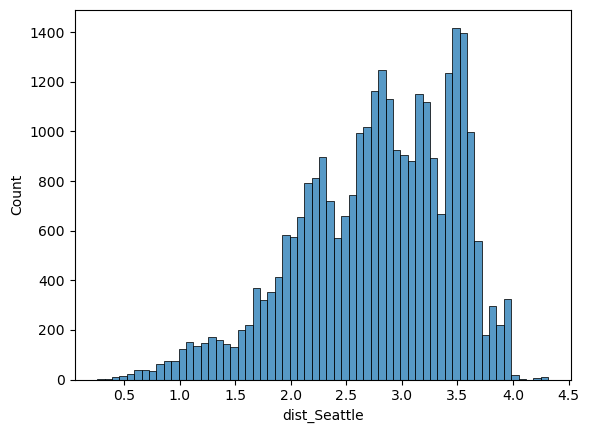

In [37]:
sns.histplot(x=np.log(df.dist_Seattle[df.dist_Seattle < 75]))

In [38]:
y = df.price[df.dist_Seattle <75]
X = sm.add_constant(df.dist_Seattle[df.dist_Seattle < 75])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04111
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.839
Time:                        13:32:59   Log-Likelihood:            -4.4115e+05
No. Observations:               29169   AIC:                         8.823e+05
Df Residuals:                   29167   BIC:                         8.823e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.111e+06   1.03e+04    107.532      0.000    1.09e+06    1.13e+06
dist_Seattle    92.5759    456.569      0.203      0.839    -802.320     987.472
==============================================================================
Omnibus:                    36864.504   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14573049.723
Skew:                           6.637   Prob(JB):                         0.00
Kurtosis:                     111.694   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
df_map = df.copy()

df_map['locat'] = list(zip(df_map.long, df_map.lat))
distance = []
for x in df_map.locat:
    distance.append(haversineSeattle(x))
df_map['dist_Seattle'] = pd.Series(distance)

df_map = df_map[(df_map.lat > 47.087) &
        (df_map.lat < 47.779) &
        (df_map.long > -122.527) &
        (df_map.long < -121.064)]

df_map.reset_index(drop=True, inplace=True)

In [212]:
df_map.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'view_enc', 'cond_enc',
       'grade_enc', 'waterfront_NO_dum', 'waterfront_YES_dum',
       'greenbelt_NO_dum', 'greenbelt_YES_dum', 'nuisance_NO_dum',
       'nuisance_YES_dum', 'view_AVERAGE_dum', 'view_EXCELLENT_dum',
       'view_FAIR_dum', 'view_GOOD_dum', 'view_NONE_dum',
       'condition_Average_dum', 'condition_Fair_dum', 'condition_Good_dum',
       'condition_Poor_dum', 'condition_Very Good_dum',
       'grade_10 Very Good_dum', 'grade_11 Excellent_dum',
       'grade_12 Luxury_dum', 'grade_13 Mansion_dum',
       'grade_2 Substandard_dum', 'grade_3 Poor_dum', 'grade_4 Low_dum',
       'grade_5 Fair_dum', 'grade_6 Low Average_dum', 'grade_7 Average_dum',
       'grade_8 Good_dum', 'grade_9 Better_dum', 'heat_source_Electricity_dum',
       'heat_source_Electricity/Solar_dum',

In [213]:
sqft_living = .445

waterfront = .491
view_above_avg = .472

gr_ab_av = .509

In [214]:
y = df_map.price
X = sm.add_constant(df_map[['dist_Seattle', 'sqft_living', 'waterfront_YES_dum', 'gr_above_avg']])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7573.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:42:19   Log-Likelihood:            -4.3089e+05
No. Observations:               29177   AIC:                         8.618e+05
Df Residuals:                   29172   BIC:                         8.618e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.939e+05   1.09e+04     36.037      0.000    3.72e+05    4.15e+05
dist_Seattle       -2.034e+04    321.442    -63.269      0.000    -2.1e+04   -1.97e+04
sqft_living          478.2012      4.717    101.383      0.000     468.956     487.446
waterfront_YES_dum  1.377e+06   2.82e+04     48.807      0.000    1.32e+06    1.43e+06
gr_above_avg        3.866e+05   1.17e+04     32.929      0.000    3.64e+05     4.1e+05
==============================================================================
Omnibus:                    43844.312   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69412498.427
Skew:                           8.800   Prob(JB):                         0.00
Kurtosis:                     241.299   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
# Create binary for house features - garage, basement, patio

df_map['has_garage'] = [1 if x > 0 else 0 for x in df_map['sqft_garage']]
df_map['has_basement'] = [1 if x > 0 else 0 for x in df_map['sqft_basement']]
df_map['has_patio'] = [1 if x > 0 else 0 for x in df_map['sqft_patio']]

In [216]:
df_map.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'view_enc', 'cond_enc',
       'grade_enc', 'waterfront_NO_dum', 'waterfront_YES_dum',
       'greenbelt_NO_dum', 'greenbelt_YES_dum', 'nuisance_NO_dum',
       'nuisance_YES_dum', 'view_AVERAGE_dum', 'view_EXCELLENT_dum',
       'view_FAIR_dum', 'view_GOOD_dum', 'view_NONE_dum',
       'condition_Average_dum', 'condition_Fair_dum', 'condition_Good_dum',
       'condition_Poor_dum', 'condition_Very Good_dum',
       'grade_10 Very Good_dum', 'grade_11 Excellent_dum',
       'grade_12 Luxury_dum', 'grade_13 Mansion_dum',
       'grade_2 Substandard_dum', 'grade_3 Poor_dum', 'grade_4 Low_dum',
       'grade_5 Fair_dum', 'grade_6 Low Average_dum', 'grade_7 Average_dum',
       'grade_8 Good_dum', 'grade_9 Better_dum', 'heat_source_Electricity_dum',
       'heat_source_Electricity/Solar_dum',

In [217]:
y = df_map.price
X = sm.add_constant(df_map[['dist_Seattle', 'sqft_living', 'waterfront_YES_dum', 'gr_above_avg']])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7573.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:42:19   Log-Likelihood:            -4.3089e+05
No. Observations:               29177   AIC:                         8.618e+05
Df Residuals:                   29172   BIC:                         8.618e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.939e+05   1.09e+04     36.037      0.000    3.72e+05    4.15e+05
dist_Seattle       -2.034e+04    321.442    -63.269      0.000    -2.1e+04   -1.97e+04
sqft_living          478.2012      4.717    101.383      0.000     468.956     487.446
waterfront_YES_dum  1.377e+06   2.82e+04     48.807      0.000    1.32e+06    1.43e+06
gr_above_avg        3.866e+05   1.17e+04     32.929      0.000    3.64e+05     4.1e+05
==============================================================================
Omnibus:                    43844.312   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69412498.427
Skew:                           8.800   Prob(JB):                         0.00
Kurtosis:                     241.299   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

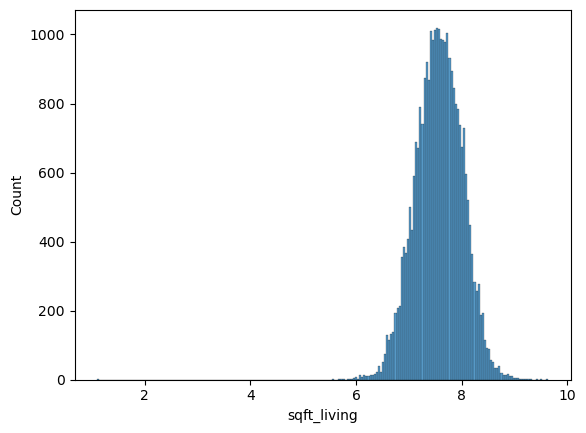

In [218]:
sns.histplot(x=np.log(df_map.sqft_living))

<AxesSubplot:xlabel='dist_Seattle', ylabel='Count'>

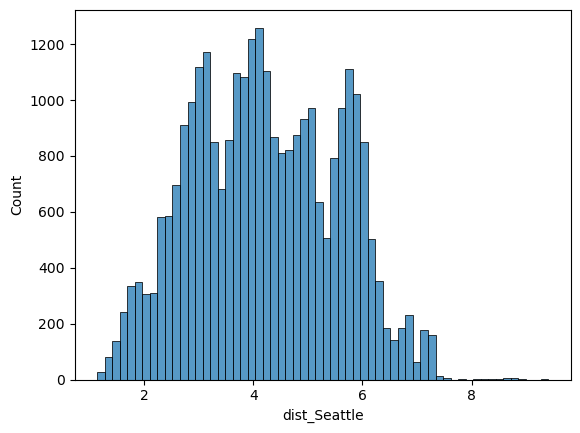

In [219]:
sns.histplot(x=np.sqrt(df_map.dist_Seattle))

<AxesSubplot:xlabel='waterfront_YES_dum', ylabel='Count'>

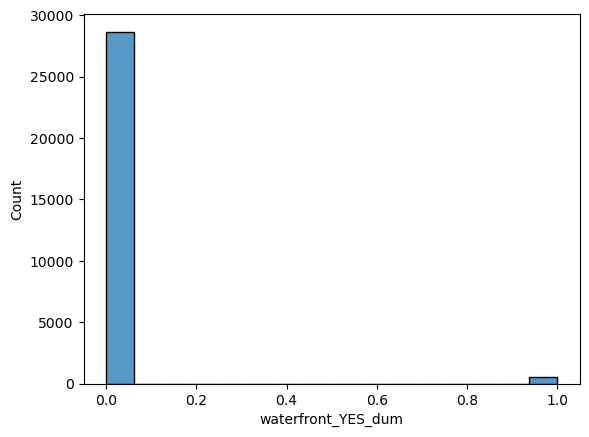

In [220]:
sns.histplot(x=df_map.waterfront_YES_dum)

<AxesSubplot:xlabel='gr_above_avg', ylabel='Count'>

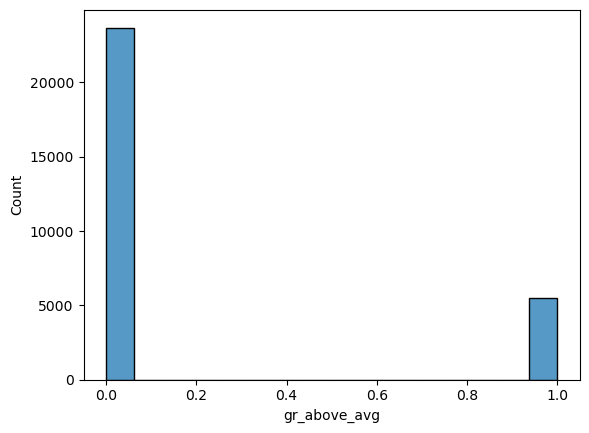

In [221]:
sns.histplot(x=df_map.gr_above_avg)

In [302]:
df_map.log_sqft_living = np.log(df_map.sqft_living)

In [303]:
df_map.sqrt_dist_Seattle = np.sqrt(df_map.dist_Seattle)

In [304]:
y = np.log(df_map.price)
X = sm.add_constant(df_map[[
    'dist_Seattle',
    'sqft_living',
    'waterfront_YES_dum',
    'gr_above_avg',
    'bathrooms'
]])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     6520.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:01   Log-Likelihood:                -14832.
No. Observations:               29177   AIC:                         2.968e+04
Df Residuals:                   29171   BIC:                         2.973e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.2681      0.008   1692.135      0.000      13.253      13.283
dist_Seattle          -0.0157      0.000    -76.368      0.000      -0.016      -0.015
sqft_living            0.0003   4.26e-06     66.489      0.000       0.000       0.000
waterfront_YES_dum     0.4652      0.018     25.710      0.000       0.430       0.501
gr_above_avg           0.2800      0.008     37.182      0.000       0.265       0.295
bathrooms              0.0482      0.004     11.449      0.000       0.040       0.056
==============================================================================
Omnibus:                     9673.241   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119811.602
Skew:                          -1.240   Prob(JB):                         0.00
Kurtosis:                      12.612   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price', ylabel='Count'>

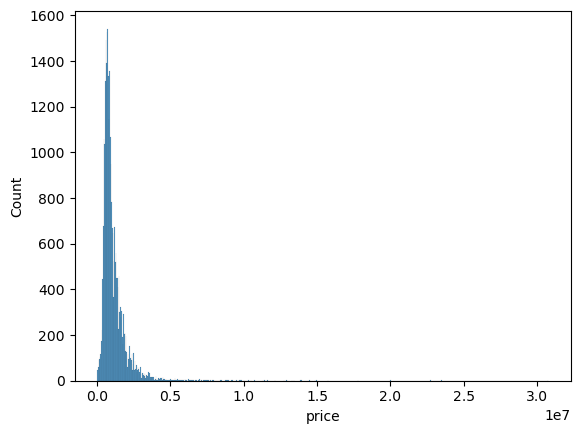

In [305]:
sns.histplot(x=df_map.price)

In [306]:
'sqft_lot', 'sqft_above', 'sqft_basement'

('sqft_lot', 'sqft_above', 'sqft_basement')

In [307]:
df_map['lot_above_ratio'] = df_map.sqft_lot/df_map.sqft_above

In [308]:
df_map['lot_basement_ratio'] = df_map.sqft_lot/df_map.sqft_basement

In [313]:
y = np.log(df_map.price)
X = sm.add_constant(df_map[[
    'dist_Seattle',
    'sqft_living',
    'waterfront_YES_dum',
    'gr_above_avg',
    'bathrooms'
]])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     6520.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:                -14832.
No. Observations:               29177   AIC:                         2.968e+04
Df Residuals:                   29171   BIC:                         2.973e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.2681      0.008   1692.135      0.000      13.253      13.283
dist_Seattle          -0.0157      0.000    -76.368      0.000      -0.016      -0.015
sqft_living            0.0003   4.26e-06     66.489      0.000       0.000       0.000
waterfront_YES_dum     0.4652      0.018     25.710      0.000       0.430       0.501
gr_above_avg           0.2800      0.008     37.182      0.000       0.265       0.295
bathrooms              0.0482      0.004     11.449      0.000       0.040       0.056
==============================================================================
Omnibus:                     9673.241   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119811.602
Skew:                          -1.240   Prob(JB):                         0.00
Kurtosis:                      12.612   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
df_new = pd.concat([df_map, city_dummies], axis=1)
df_new.dropna(inplace=True)
list(df_new.columns)

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'view_enc',
 'cond_enc',
 'grade_enc',
 'waterfront_NO_dum',
 'waterfront_YES_dum',
 'greenbelt_NO_dum',
 'greenbelt_YES_dum',
 'nuisance_NO_dum',
 'nuisance_YES_dum',
 'view_AVERAGE_dum',
 'view_EXCELLENT_dum',
 'view_FAIR_dum',
 'view_GOOD_dum',
 'view_NONE_dum',
 'condition_Average_dum',
 'condition_Fair_dum',
 'condition_Good_dum',
 'condition_Poor_dum',
 'condition_Very Good_dum',
 'grade_10 Very Good_dum',
 'grade_11 Excellent_dum',
 'grade_12 Luxury_dum',
 'grade_13 Mansion_dum',
 'grade_2 Substandard_dum',
 'grade_3 Poor_dum',
 'grade_4 Low_dum',
 'grade_5 Fair_dum',
 'grade_6 Low Average_dum',
 'grade_7 Average_dum',
 'grade_8 Good_dum',
 'grade_9 Better_dum',
 'heat_source_Electricity_dum',
 'heat_source_Electricity/Solar_dum',
 'heat_source_Gas_dum',
 'heat_source_Gas/Solar_dum',
 '

In [315]:
abs(df.corr()['price']).sort_values(ascending=False)

price                                  1.000000
sqft_living                            0.616801
grade_enc                              0.577741
sqft_above                             0.546204
gr_above_avg                           0.496969
                                         ...   
sewer_system_PRIVATE RESTRICTED_dum    0.004329
heat_source_Oil/Solar_dum              0.002359
heat_source_Other_dum                  0.001031
dist_Seattle                           0.001005
sewer_system_PUBLIC RESTRICTED_dum     0.000646
Name: price, Length: 61, dtype: float64

In [316]:
waterfront = .526

cond above = .530

bathrooms = .532

SyntaxError: invalid syntax (2163755249.py, line 3)

In [318]:
df_new['log_sqft_living'] = np.log(df.sqft_living)
df_new['sqrt_dist_Seattle'] = np.sqrt(df.dist_Seattle)

In [325]:
y = df_new.price
X = sm.add_constant(df_new[[
    'sqft_living',
    'dist_Seattle',
    'gr_above_avg',
    'waterfront_YES_dum',
    'cond_above_avg',
    'has_garage'   
]])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5101.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:00:53   Log-Likelihood:            -4.3081e+05
No. Observations:               29177   AIC:                         8.616e+05
Df Residuals:                   29170   BIC:                         8.617e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.493e+05   1.15e+04     30.345      0.000    3.27e+05    3.72e+05
sqft_living          475.0939      4.807     98.829      0.000     465.672     484.516
dist_Seattle       -2.085e+04    334.598    -62.322      0.000   -2.15e+04   -2.02e+04
gr_above_avg        3.989e+05   1.18e+04     33.832      0.000    3.76e+05    4.22e+05
waterfront_YES_dum  1.382e+06   2.83e+04     48.845      0.000    1.33e+06    1.44e+06
cond_above_avg      9.131e+04   7621.733     11.980      0.000    7.64e+04    1.06e+05
has_garage          3.466e+04   8594.257      4.033      0.000    1.78e+04    5.15e+04
==============================================================================
Omnibus:                    44115.662   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         71608702.741
Skew:                           8.907   Prob(JB):                         0.00
Kurtosis:                     245.044   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
y = df_new.price
X = sm.add_constant(df_new[[
    'sqft_living',
    'dist_Seattle',
    'gr_above_avg',
    'waterfront_YES_dum',
    'cond_above_avg',
    'has_garage'   
]])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5101.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:26:06   Log-Likelihood:            -4.3081e+05
No. Observations:               29177   AIC:                         8.616e+05
Df Residuals:                   29170   BIC:                         8.617e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.493e+05   1.15e+04     30.345      0.000    3.27e+05    3.72e+05
sqft_living          475.0939      4.807     98.829      0.000     465.672     484.516
dist_Seattle       -2.085e+04    334.598    -62.322      0.000   -2.15e+04   -2.02e+04
gr_above_avg        3.989e+05   1.18e+04     33.832      0.000    3.76e+05    4.22e+05
waterfront_YES_dum  1.382e+06   2.83e+04     48.845      0.000    1.33e+06    1.44e+06
cond_above_avg      9.131e+04   7621.733     11.980      0.000    7.64e+04    1.06e+05
has_garage          3.466e+04   8594.257      4.033      0.000    1.78e+04    5.15e+04
==============================================================================
Omnibus:                    44115.662   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         71608702.741
Skew:                           8.907   Prob(JB):                         0.00
Kurtosis:                     245.044   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [327]:
# Create a column of mean prices by zip

# Get zip code form address

df['zip'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
df['zip'].head(50)

#Creaet dict of mean prices by zip code
zips_avg_prices = df.groupby(df.zip).mean()['price']
zip_mean_dict = zips_avg_prices.to_dict()

# Map mean proce by zip into new column
df['zip_mean'] = df_new['zip'].map(zip_mean_dict)
df['zip_mean']

# Create zip price mean category column

price_cat = []

for price in df_new['zip_mean']:
    if price < 714997.7:
        price_cat.append(1)
    elif price < 1320000:
        price_cat.append(2)
    else:
        price_cat.append(3)
        
df['price_cat'] = price_cat

KeyError: 'address'

AttributeError: 'DataFrame' object has no attribute 'address'